In [344]:
import pandas as pd
import numpy as np


df = pd.read_csv('./dataset/train.csv')

In [345]:
df.shape

(891, 12)

In [346]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [348]:
import pandas_profiling as pp

In [349]:
report = pp.ProfileReport(df)
report.to_file('ProfileReport.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 75.59it/s]


In [350]:
report

We will plot nice graphs

In [351]:
import matplotlib.pyplot as plt
import seaborn as sns


In [352]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot: >

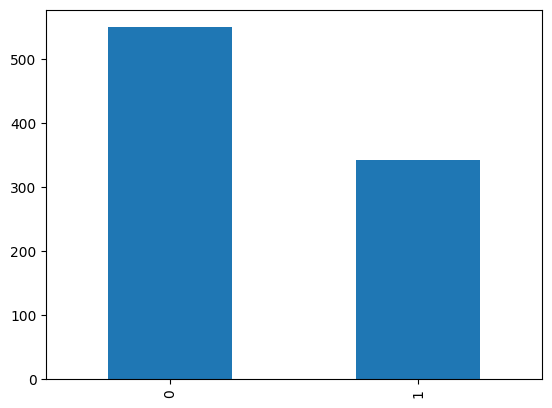

In [353]:
bar_data= df['Survived'].value_counts()
bar_data.plot(kind = 'bar')

Better bar plot ? 


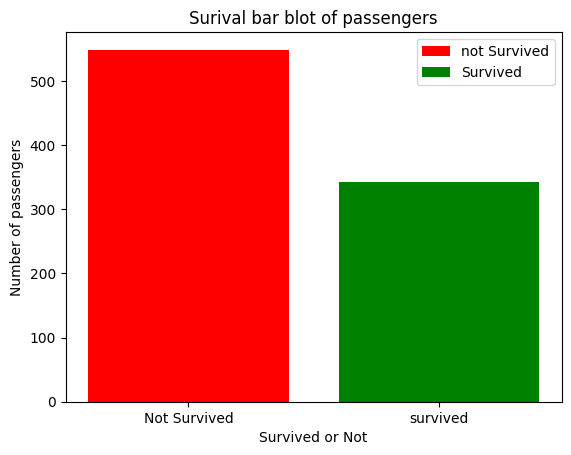

In [354]:
%matplotlib inline
not_survived={'Not Survived' : bar_data[0]}
survived={'survived' : bar_data[1]}
plt.bar(not_survived.keys(),not_survived.values(), color='red' , label = f'not Survived')
plt.bar(survived.keys(),survived.values(), color='green', label = f'Survived')
plt.xlabel('Survived or Not')
plt.ylabel('Number of passengers')
plt.title('Surival bar blot of passengers')
plt.legend()
plt.show()

In [355]:
print(f"Survived passengers percentage is {round(bar_data[1]/df.shape[0]*100,1)}")
print(f"Survived passengers percentage is {round(bar_data[0]/df.shape[0]*100,1)}")

Survived passengers percentage is 38.4
Survived passengers percentage is 61.6


lets start working on categorical columns 

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [357]:
cat_df = df[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].copy()

In [358]:
cat_df['Embarked'].isnull().sum()

2

In [359]:
embarked_mode = cat_df['Embarked'].mode()[0]
cat_df['Embarked'].fillna(embarked_mode , inplace=True)

In [360]:
cat_df['Embarked'].isnull().sum()

0

In [361]:
cat_df.shape

(891, 5)

In [362]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  891 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


In [363]:
cat_df['Cabin'].fillna('No_cabin', inplace=True)

In [364]:
cat_df['Cabin'].isnull().sum()

0

In [365]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     891 non-null    object
 4   Embarked  891 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


## Null values are handled precisely , lets go for one hot encoding now

In [366]:
cat_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

Lets drop ticket number feature as it is of no use

In [367]:
cat_df.drop('Ticket', inplace= True, axis = 1)

In [368]:
cat_df

Name     Sex     Cabin  \
0                              Braund, Mr. Owen Harris    male  No_cabin   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female       C85   
2                               Heikkinen, Miss. Laina  female  No_cabin   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      C123   
4                             Allen, Mr. William Henry    male  No_cabin   
..                                                 ...     ...       ...   
886                              Montvila, Rev. Juozas    male  No_cabin   
887                       Graham, Miss. Margaret Edith  female       B42   
888           Johnston, Miss. Catherine Helen "Carrie"  female  No_cabin   
889                              Behr, Mr. Karl Howell    male      C148   
890                                Dooley, Mr. Patrick    male  No_cabin   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
886        S  
887        S  
888        S  
889        C  
890        Q  

[891 rows x 4 columns]

lets create value whether cabin available or not 

In [369]:
cat_df.loc[cat_df['Cabin'] != 'No_cabin', 'Cabin'] = 'cabin' 

In [370]:
cat_df['Cabin']

0      No_cabin
1         cabin
2      No_cabin
3         cabin
4      No_cabin
         ...   
886    No_cabin
887       cabin
888    No_cabin
889       cabin
890    No_cabin
Name: Cabin, Length: 891, dtype: object

Name     Sex     Cabin  \
0                              Braund, Mr. Owen Harris    male  No_cabin   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female     cabin   
2                               Heikkinen, Miss. Laina  female  No_cabin   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female     cabin   
4                             Allen, Mr. William Henry    male  No_cabin   
..                                                 ...     ...       ...   
886                              Montvila, Rev. Juozas    male  No_cabin   
887                       Graham, Miss. Margaret Edith  female     cabin   
888           Johnston, Miss. Catherine Helen "Carrie"  female  No_cabin   
889                              Behr, Mr. Karl Howell    male     cabin   
890                                Dooley, Mr. Patrick    male  No_cabin   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
886        S  
887        S  
888        S  
889        C  
890        Q  

[891 rows x 4 columns]

In [373]:


for idx in cat_df.index:
    cat_df.loc[ idx , 'first_letter'] = (cat_df['Name'][idx][0])



In [374]:
cat_df

Name     Sex     Cabin  \
0                              Braund, Mr. Owen Harris    male  No_cabin   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female     cabin   
2                               Heikkinen, Miss. Laina  female  No_cabin   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female     cabin   
4                             Allen, Mr. William Henry    male  No_cabin   
..                                                 ...     ...       ...   
886                              Montvila, Rev. Juozas    male  No_cabin   
887                       Graham, Miss. Margaret Edith  female     cabin   
888           Johnston, Miss. Catherine Helen "Carrie"  female  No_cabin   
889                              Behr, Mr. Karl Howell    male     cabin   
890                                Dooley, Mr. Patrick    male  No_cabin   

    Embarked first_letter  
0          S            B  
1          C            C  
2          S            H  
3          S            F  
4          S            A  
..       ...          ...  
886        S            M  
887        S            G  
888        S            J  
889        C            B  
890        Q            D  

[891 rows x 5 columns]

In [375]:
cat_df.drop('Name', axis = 1 , inplace = True)

In [376]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sex           891 non-null    object
 1   Cabin         891 non-null    object
 2   Embarked      891 non-null    object
 3   first_letter  891 non-null    object
dtypes: object(4)
memory usage: 28.0+ KB


In [377]:
cat_df

Sex     Cabin Embarked first_letter
0      male  No_cabin        S            B
1    female     cabin        C            C
2    female  No_cabin        S            H
3    female     cabin        S            F
4      male  No_cabin        S            A
..      ...       ...      ...          ...
886    male  No_cabin        S            M
887  female     cabin        S            G
888  female  No_cabin        S            J
889    male     cabin        C            B
890    male  No_cabin        Q            D

[891 rows x 4 columns]

let apply one hot encoding on categorical datasets


In [390]:
from sklearn.preprocessing import OneHotEncoder

OneHot = OneHotEncoder(categories='auto', sparse_output = False)
processed_cat_df = OneHot.fit_transform(cat_df)


In [391]:
processed_cat_df

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [392]:
cat_df_proccessed = pd.DataFrame(processed_cat_df , columns = OneHot.get_feature_names_out())

In [393]:
cat_df_proccessed

Sex_female  Sex_male  Cabin_No_cabin  Cabin_cabin  Embarked_C  \
0           0.0       1.0             1.0          0.0         0.0   
1           1.0       0.0             0.0          1.0         1.0   
2           1.0       0.0             1.0          0.0         0.0   
3           1.0       0.0             0.0          1.0         0.0   
4           0.0       1.0             1.0          0.0         0.0   
..          ...       ...             ...          ...         ...   
886         0.0       1.0             1.0          0.0         0.0   
887         1.0       0.0             0.0          1.0         0.0   
888         1.0       0.0             1.0          0.0         0.0   
889         0.0       1.0             0.0          1.0         1.0   
890         0.0       1.0             1.0          0.0         0.0   

     Embarked_Q  Embarked_S  first_letter_A  first_letter_B  first_letter_C  \
0           0.0         1.0             0.0             1.0             0.0   
1           0.0         0.0             0.0             0.0             1.0   
2           0.0         1.0             0.0             0.0             0.0   
3           0.0         1.0             0.0             0.0             0.0   
4           0.0         1.0             1.0             0.0             0.0   
..          ...         ...             ...             ...             ...   
886         0.0         1.0             0.0             0.0             0.0   
887         0.0         1.0             0.0             0.0             0.0   
888         0.0         1.0             0.0             0.0             0.0   
889         0.0         0.0             0.0             1.0             0.0   
890         1.0         0.0             0.0             0.0             0.0   

     ...  first_letter_R  first_letter_S  first_letter_T  first_letter_U  \
0    ...             0.0             0.0             0.0             0.0   
1    ...             0.0             0.0             0.0             0.0   
2    ...             0.0             0.0             0.0             0.0   
3    ...             0.0             0.0             0.0             0.0   
4    ...             0.0             0.0             0.0             0.0   
..   ...             ...             ...             ...             ...   
886  ...             0.0             0.0             0.0             0.0   
887  ...             0.0             0.0             0.0             0.0   
888  ...             0.0             0.0             0.0             0.0   
889  ...             0.0             0.0             0.0             0.0   
890  ...             0.0             0.0             0.0             0.0   

     first_letter_V  first_letter_W  first_letter_Y  first_letter_Z  \
0               0.0             0.0             0.0             0.0   
1               0.0             0.0             0.0             0.0   
2               0.0             0.0             0.0             0.0   
3               0.0             0.0             0.0             0.0   
4               0.0             0.0             0.0             0.0   
..              ...             ...             ...             ...   
886             0.0             0.0             0.0             0.0   
887             0.0             0.0             0.0             0.0   
888             0.0             0.0             0.0             0.0   
889             0.0             0.0             0.0             0.0   
890             0.0             0.0             0.0             0.0   

     first_letter_d  first_letter_v  
0               0.0             0.0  
1               0.0             0.0  
2               0.0             0.0  
3               0.0             0.0  
4               0.0             0.0  
..              ...             ...  
886             0.0             0.0  
887             0.0             0.0  
888             0.0             0.0  
889             0.0             0.0  
890             0.0            

## we have succefully processed our catogorical data 

Lets work on numerical Data

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [414]:
num_df = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy(deep= True)
num_df

Pclass   Age  SibSp  Parch     Fare
0         3  22.0      1      0   7.2500
1         1  38.0      1      0  71.2833
2         3  26.0      0      0   7.9250
3         1  35.0      1      0  53.1000
4         3  35.0      0      0   8.0500
..      ...   ...    ...    ...      ...
886       2  27.0      0      0  13.0000
887       1  19.0      0      0  30.0000
888       3   NaN      1      2  23.4500
889       1  26.0      0      0  30.0000
890       3  32.0      0      0   7.7500

[891 rows x 5 columns]

array([[<AxesSubplot: title={'center': 'Pclass'}>,
        <AxesSubplot: title={'center': 'Age'}>],
       [<AxesSubplot: title={'center': 'SibSp'}>,
        <AxesSubplot: title={'center': 'Parch'}>],
       [<AxesSubplot: title={'center': 'Fare'}>, <AxesSubplot: >]],
      dtype=object)

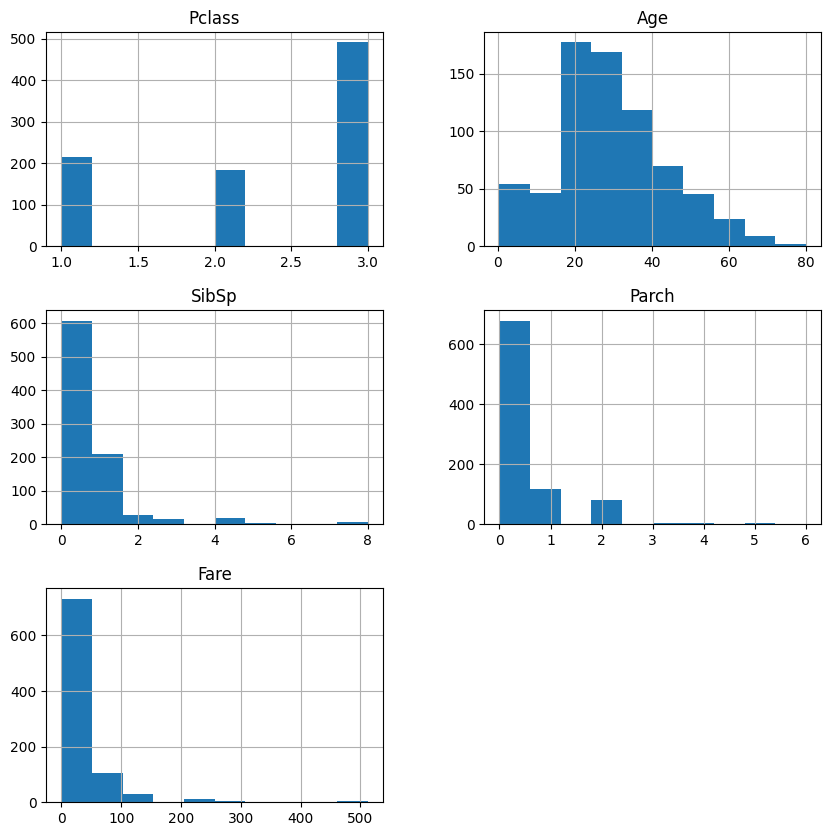

In [415]:
num_df.hist(figsize= (10,10))

Lets use standard scaler to scale the features to same levels

In [416]:
num_df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [417]:
age_median = num_df['Age'].median() 
num_df.loc[num_df['Age'].isnull() , 'Age'] = age_median
age_median

28.0

In [418]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


Lets create grouped passengers 

In [420]:
num_df['PassengerGroup'] = num_df['SibSp'] + num_df['Parch'] +1


In [422]:
num_df['PassengerGroup'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: PassengerGroup
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [423]:
num_df['IsAlone'] = num_df['PassengerGroup'].apply(lambda x:1 if x ==1 else 0)

In [424]:
num_df['IsAlone'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: IsAlone
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [425]:
num_df.head()

Pclass   Age  SibSp  Parch     Fare  PassengerGroup  IsAlone
0       3  22.0      1      0   7.2500               2        0
1       1  38.0      1      0  71.2833               2        0
2       3  26.0      0      0   7.9250               1        1
3       1  35.0      1      0  53.1000               2        0
4       3  35.0      0      0   8.0500               1        1

lets drop sibsp and parch columns 

In [426]:
num_df.drop(columns=['SibSp', 'Parch'], inplace=True)

In [427]:
num_df

Pclass   Age     Fare  PassengerGroup  IsAlone
0         3  22.0   7.2500               2        0
1         1  38.0  71.2833               2        0
2         3  26.0   7.9250               1        1
3         1  35.0  53.1000               2        0
4         3  35.0   8.0500               1        1
..      ...   ...      ...             ...      ...
886       2  27.0  13.0000               1        1
887       1  19.0  30.0000               1        1
888       3  28.0  23.4500               4        0
889       1  26.0  30.0000               1        1
890       3  32.0   7.7500               1        1

[891 rows x 5 columns]

lets standardise fare and age columns 


In [428]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_df[['Age', 'Fare']] = sc.fit_transform(num_df[['Age', 'Fare']])


In [429]:
num_df

Pclass       Age      Fare  PassengerGroup  IsAlone
0         3 -0.565736 -0.502445               2        0
1         1  0.663861  0.786845               2        0
2         3 -0.258337 -0.488854               1        1
3         1  0.433312  0.420730               2        0
4         3  0.433312 -0.486337               1        1
..      ...       ...       ...             ...      ...
886       2 -0.181487 -0.386671               1        1
887       1 -0.796286 -0.044381               1        1
888       3 -0.104637 -0.176263               4        0
889       1 -0.258337 -0.044381               1        1
890       3  0.202762 -0.492378               1        1

[891 rows x 5 columns]

In [472]:
y = df['Survived']
X = pd.concat([num_df, cat_df_proccessed], axis = 1)


In [446]:
X.columns

Index(['Pclass', 'Age', 'Fare', 'PassengerGroup', 'IsAlone', 'Sex_female',
       'Sex_male', 'Cabin_No_cabin', 'Cabin_cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'first_letter_A', 'first_letter_B', 'first_letter_C',
       'first_letter_D', 'first_letter_E', 'first_letter_F', 'first_letter_G',
       'first_letter_H', 'first_letter_I', 'first_letter_J', 'first_letter_K',
       'first_letter_L', 'first_letter_M', 'first_letter_N', 'first_letter_O',
       'first_letter_P', 'first_letter_Q', 'first_letter_R', 'first_letter_S',
       'first_letter_T', 'first_letter_U', 'first_letter_V', 'first_letter_W',
       'first_letter_Y', 'first_letter_Z', 'first_letter_d', 'first_letter_v'],
      dtype='object')

In [482]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
params = {
          'solver': ['saga','lbfgs' ],
          'C':[1,10], 'max_iter':[5000]}
gs = GridSearchCV(lr , params , cv=10)



In [483]:
gs.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 10], 'max_iter': [5000],
                         'solver': ['saga', 'lbfgs']})

In [484]:
gs.best_estimator_

LogisticRegression(C=1, max_iter=5000, solver='saga')

In [485]:
gs.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 10], 'max_iter': [5000],
                         'solver': ['saga', 'lbfgs']})>

In [486]:
gs.best_score_

0.8159425717852683

In [487]:
y_hat = gs.predict(X)

In [488]:
from sklearn.metrics import accuracy_score
lr_score = accuracy_score(y_hat , y)


In [489]:
lr_score

0.8294051627384961

In [494]:
score_table = {'Logistic Regression' : round(lr_score,2)}
score_table

{'Logistic Regression': 0.83}

In [501]:
from sklearn.svm import SVR
sv = SVR()

params = {
    'kernel': ['linear', 'poly','rbf'],
    'gamma' : [0.1 , 1, 10 ,100 ,1000 , 5 ,15 ],
    'max_iter' : [10000]
}

gs2 = GridSearchCV(sv , params , cv= 10)
gs2.fit(X, y)

d:\Github\kaggle_titanic\Kaggle_Competition--Titanic-ML\venv\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
d:\Github\kaggle_titanic\Kaggle_Competition--Titanic-ML\venv\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
d:\Github\kaggle_titanic\Kaggle_Competition--Titanic-ML\venv\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
d:\Github\kaggle_titanic\Kaggle_Competition--Titanic-ML\venv\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxS

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'gamma': [0.1, 1, 10, 100, 1000, 5, 15],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'max_iter': [10000]})

In [502]:
gs.best_score_

0.8159425717852683

In [504]:
y_hat1 = gs.predict(X)
svr_score = accuracy_score(y_hat1 , y)

In [505]:
svr_score

0.8294051627384961

In [506]:
score_table = {'SVR score': round(svr_score, 2)}

In [510]:
score_table['Logistics_Regression_Score'] = (round(lr_score,2))

In [511]:
score_table

{'SVR score': 0.83, 'Logistics_Regression_Score': 0.83}

In [513]:
from sklearn.ensemble import RandomForestClassifier
rf_params = {
    'max_depth': [7],
    'min_samples_leaf': [1],
    'min_samples_split': [6],
    'n_estimators': [70]
}
rfc = RandomForestClassifier(random_state=42)
gs3 = GridSearchCV(rfc , rf_params  , cv = 10 , scoring = 'accuracy')
gs3.fit(X, y)



GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [7], 'min_samples_leaf': [1],
                         'min_samples_split': [6], 'n_estimators': [70]},
             scoring='accuracy')

In [514]:
gs3.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_split=6, n_estimators=70,
                       random_state=42)

In [515]:
gs3.best_score_

0.8271285892634206

In [517]:
y_hat3 = gs3.predict(X)
rfc_score = accuracy_score(y_hat3 , y)
rfc_score

0.8653198653198653

In [518]:
score_table['Random Forest Score']  = round(rfc_score , 2) 

In [521]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt_params={
    'criterion':['gini','entropy'],
    'max_depth':[5,10,15,3,20,30,40,50,60,70],
    'min_samples_split':[3,5,8,2,10,15,20,40],
    'min_samples_leaf': [2,3,4,5,8,10,15,16],
    'max_features' : [2,3,4,5,6,10,20,30]
}

gs4 = GridSearchCV(dt , dt_params , cv = 10 )

In [522]:
gs4.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 3, 20, 30, 40, 50, 60, 70],
                         'max_features': [2, 3, 4, 5, 6, 10, 20, 30],
                         'min_samples_leaf': [2, 3, 4, 5, 8, 10, 15, 16],
                         'min_samples_split': [3, 5, 8, 2, 10, 15, 20, 40]})

In [523]:
gs4.best_score_

0.8384269662921348

In [524]:
y_hat4 = gs4.predict(X)
dt_score = accuracy_score(y_hat4 , y)

In [525]:
dt_score

0.8799102132435466

In [526]:
score_table['Decision Tree Score'] = round(dt_score , 2)

In [527]:
score_table

{'SVR score': 0.83,
 'Logistics_Regression_Score': 0.83,
 'Random Forest Score': 0.87,
 'Decision Tree Score': 0.88}

In [528]:
gs4.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=30,
                       min_samples_leaf=4, min_samples_split=20,
                       random_state=42)

In [534]:
gs4.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 20}

In [535]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate


gnb = GaussianNB()

gnb_score = cross_validate(gnb , X, y , scoring = 'accuracy', cv = 10)



In [536]:
gnb_score

{'fit_time': array([0.01562595, 0.00998235, 0.0090766 , 0.01100564, 0.01632261,
        0.0049994 , 0.00499964, 0.006001  , 0.0079999 , 0.00320983]),
 'score_time': array([0.00827003, 0.0080235 , 0.01031017, 0.00700021, 0.00599551,
        0.0030005 , 0.00678921, 0.0049963 , 0.00600314, 0.        ]),
 'test_score': array([0.41111111, 0.40449438, 0.41573034, 0.42696629, 0.40449438,
        0.39325843, 0.39325843, 0.39325843, 0.40449438, 0.40449438])}

In [542]:
gs5 = GridSearchCV(gnb , param_grid={'priors': [None]},  cv = 10)
gs5.fit(X,y)

GridSearchCV(cv=10, estimator=GaussianNB(), param_grid={'priors': [None]})

In [543]:
gs5.best_score_

0.4051560549313359

In [544]:
gs5.score

<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=GaussianNB(), param_grid={'priors': [None]})>

In [545]:
y_hat5 = gs5.predict(X)
naive_score = accuracy_score(y_hat5 , y)
naive_score


0.42424242424242425

In [546]:
score_table['Naive Bayes Score'] = round(naive_score , 2)

In [550]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
gs6 = GridSearchCV(knn , param_grid = {
    'n_neighbors': [2,3,4,5,6,8,10,15,20,25,18],
    'weights':['uniform', 'distance'],
    'algorithm':['auto','ball_tree','kd_tree']
}, cv= 10)


In [551]:
gs6.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [2, 3, 4, 5, 6, 8, 10, 15, 20, 25, 18],
                         'weights': ['uniform', 'distance']})

In [552]:
gs6.best_score_

0.821598002496879

In [553]:
y_hat6 = gs6.predict(X)
knn_score = accuracy_score(y_hat6, y)

In [554]:
knn_score

0.8574635241301908

In [555]:
score_table['KNeoghbors Score'] = round(knn_score, 2)

In [556]:
score_table

{'SVR score': 0.83,
 'Logistics_Regression_Score': 0.83,
 'Random Forest Score': 0.87,
 'Decision Tree Score': 0.88,
 'Naive Bayes Score': 0.42,
 'KNeoghbors Score': 0.86}